# Rock Paper Scissors

In [3]:
from games.rps import RPS
import numpy as np
import matplotlib.pyplot as plt
from agents.random_agent import RandomAgent
from agents.fictitious_play import FictitiousPlay
from agents.regret_matching import RegretMatching
from utilities.utils import run_and_plot, plot_convergence_to_nash, plot_action_histogram, plot_action_trace_from_history
from utilities.utils import plot_dual_agent_simplex, compute_empirical_distributions

In [4]:
#initialize game
game = RPS()
game.reset()

#print game information
agents = game.agents
moves = game._moves
num_action = game._num_actions
action_spaces = game.action_spaces
observation_spaces = game.observation_spaces 

ACTION_ROCK = 0
ACTION_PAPER = 1
ACTION_SCISSORS = 2
ACTION_LABELS = ['Rock', 'Paper', 'Scissors']
print("Game Information:")
print("Agents:", agents)
print("Moves:", moves)
print("Number of Actions:", num_action)
print("Action Spaces:", action_spaces)
print("Observation Spaces:", observation_spaces)

Game Information:
Agents: ['agent_0', 'agent_1']
Moves: ['R', 'P', 'S']
Number of Actions: 3
Action Spaces: {'agent_0': Discrete(3), 'agent_1': Discrete(3)}
Observation Spaces: {'agent_0': typing.Dict[~AgentID, ~ActionType], 'agent_1': typing.Dict[~AgentID, ~ActionType]}


# Fictitious Play vs Fictitious Play

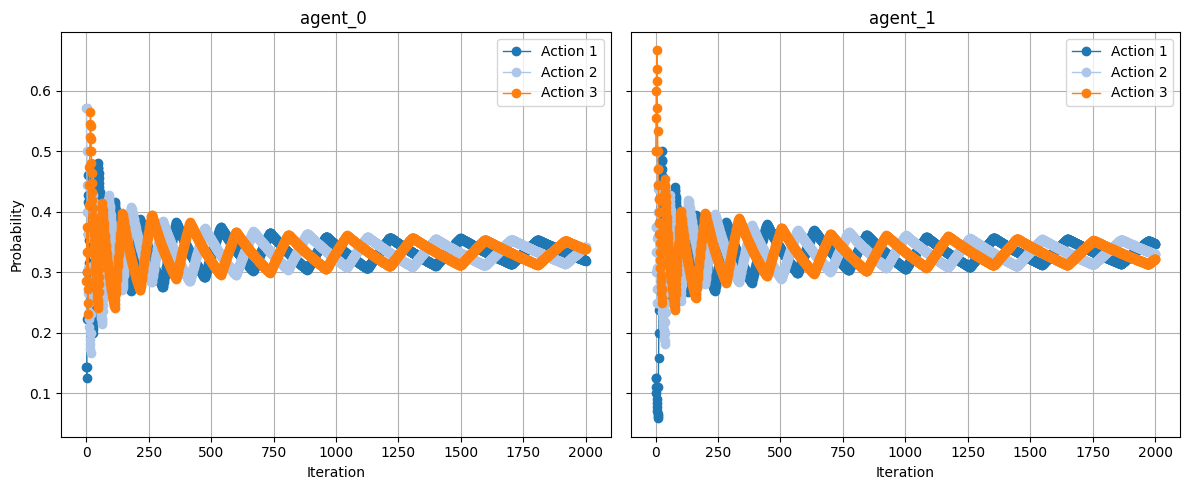

In [5]:
fp_agents = {agent: FictitiousPlay(game, agent, seed=2) for agent in agents}
policies, action_history = run_and_plot(fp_agents, game, num_iterations=2000, title_suffix="")

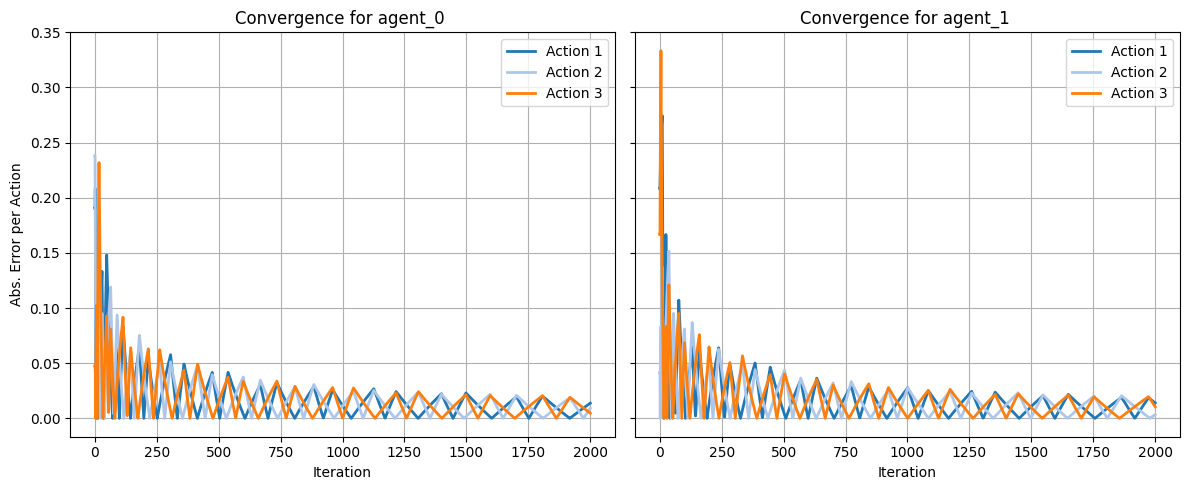

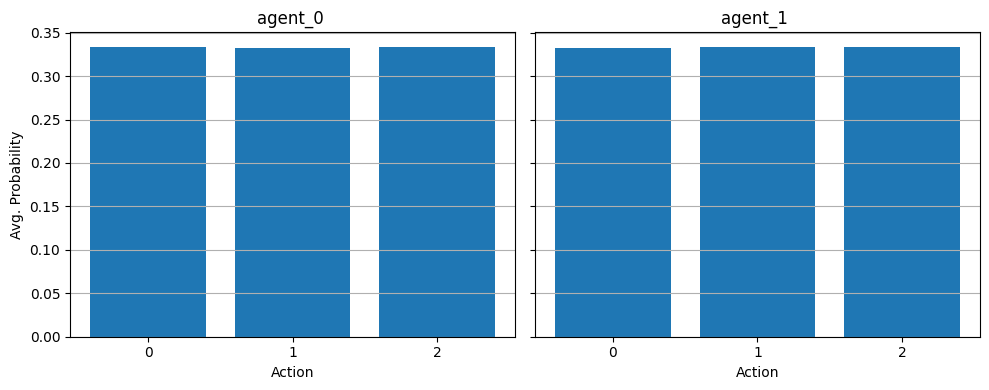

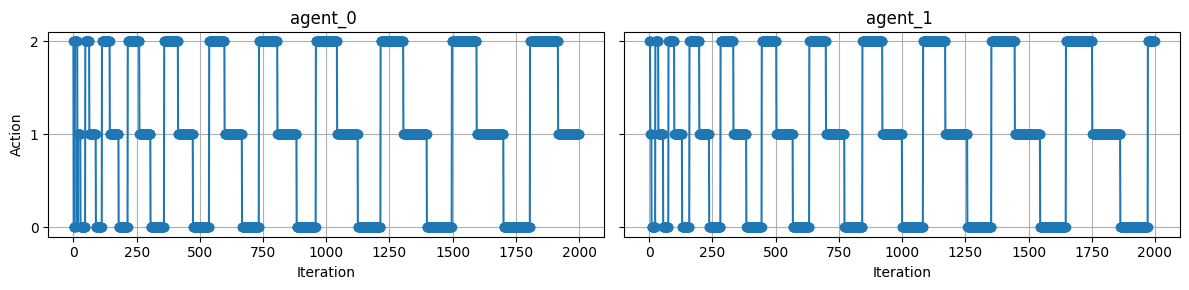

In [6]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

empirical = compute_empirical_distributions(action_history)




Plotting Rock (X) vs Paper (Y)...


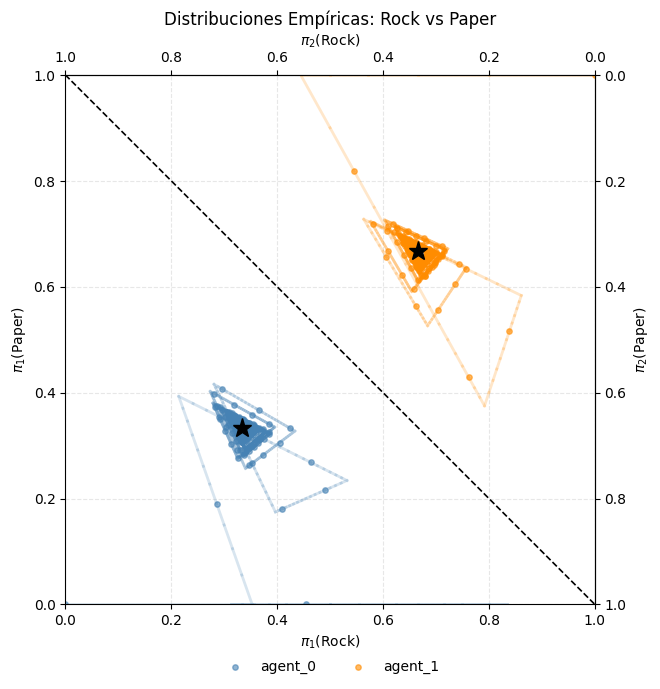


Plotting Paper (X) vs Scissors (Y)...


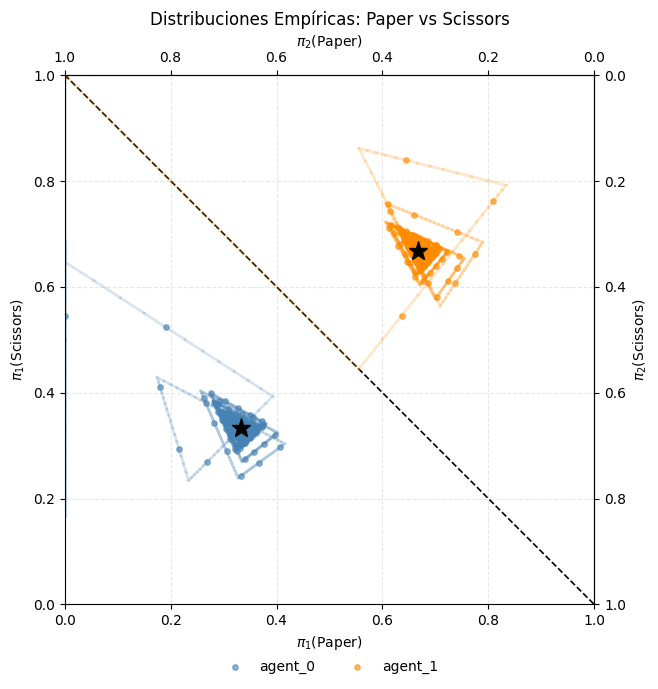


Plotting Scissors (X) vs Rock (Y)...


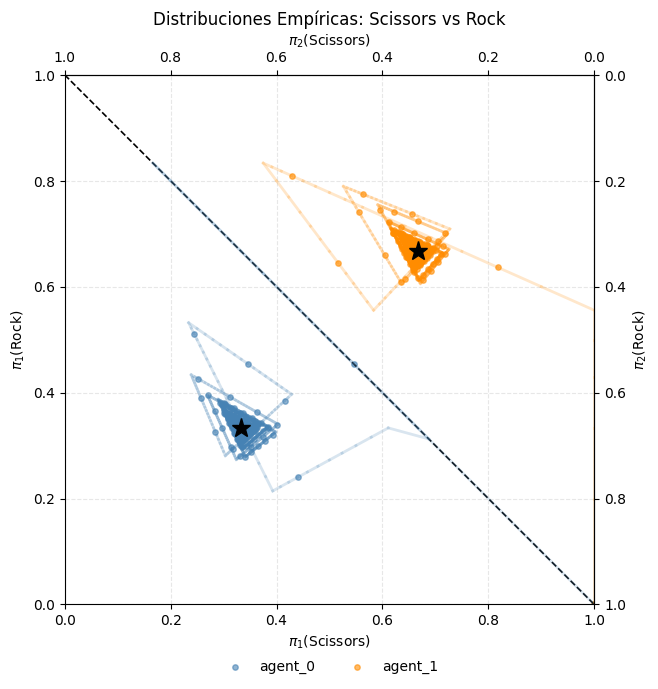

In [7]:
print("Plotting Rock (X) vs Paper (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_ROCK,    # Eje X: Probabilidad de Rock
    action2_idx=ACTION_PAPER,   # Eje Y: Probabilidad de Paper
    title="Distribuciones Empíricas: Rock vs Paper"
)

print("\nPlotting Paper (X) vs Scissors (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_PAPER,   # Eje X: Probabilidad de Paper
    action2_idx=ACTION_SCISSORS, # Eje Y: Probabilidad de Scissors
    title="Distribuciones Empíricas: Paper vs Scissors"
)

print("\nPlotting Scissors (X) vs Rock (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_SCISSORS, # Eje X: Probabilidad de Scissors
    action2_idx=ACTION_ROCK,     # Eje Y: Probabilidad de Rock
    title="Distribuciones Empíricas: Scissors vs Rock"
)



In [8]:
for agent in fp_agents:
    print(agent, fp_agents[agent].policy())


agent_0 [0.31954138 0.34247258 0.33798604]
agent_1 [0.3472845  0.32984554 0.32286996]


# Regret Matching vs Regret Matching

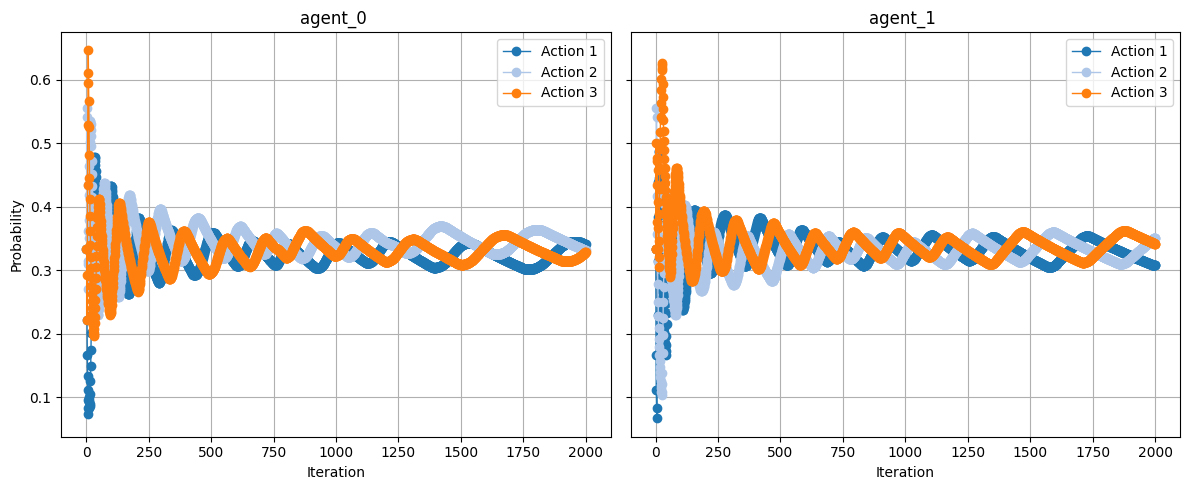

In [9]:
rm_agents = {agent: RegretMatching(game, agent, seed=26) for agent in agents}
policies, action_history = run_and_plot(rm_agents, game, num_iterations=2000, title_suffix="")

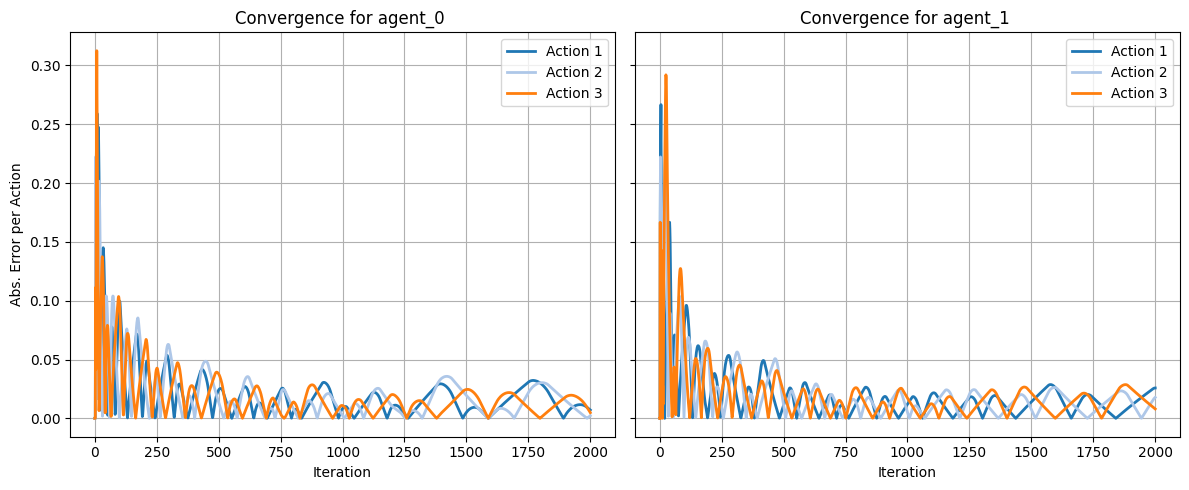

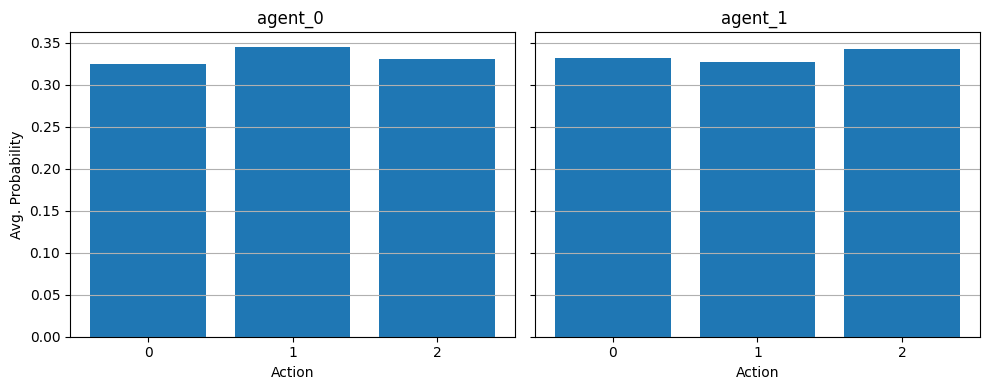

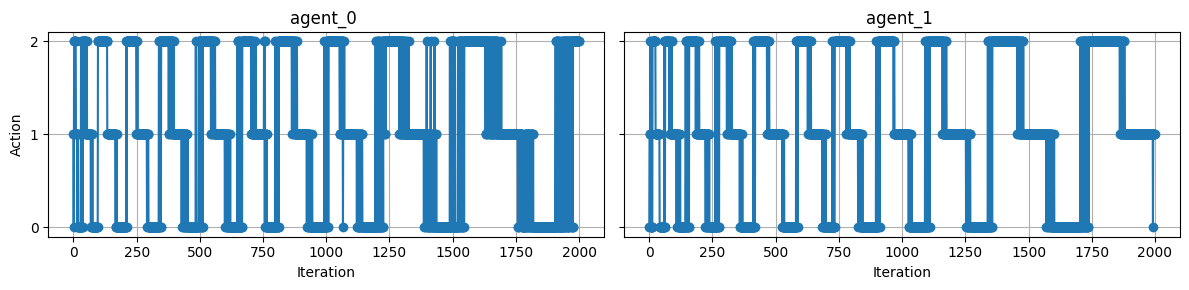

In [10]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

empirical = compute_empirical_distributions(action_history)



Plotting Rock (X) vs Paper (Y)...


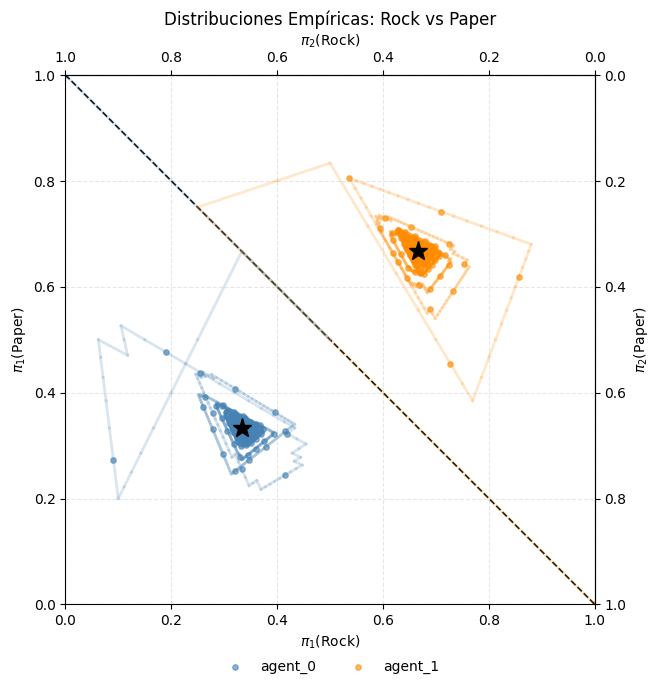


Plotting Paper (X) vs Scissors (Y)...


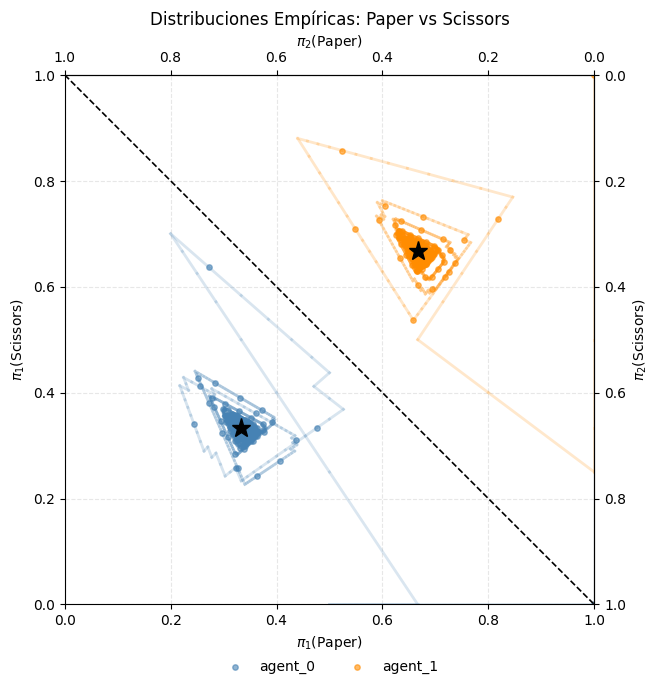


Plotting Scissors (X) vs Rock (Y)...


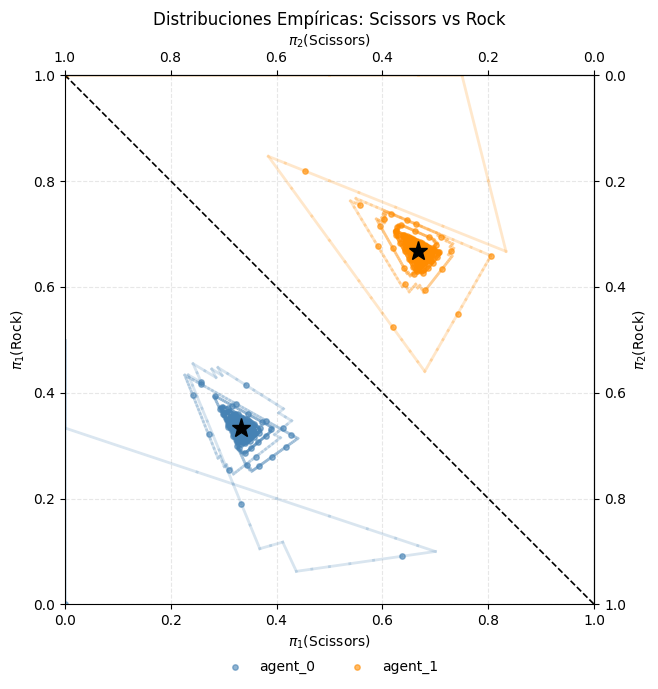

In [11]:
print("Plotting Rock (X) vs Paper (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_ROCK,    # Eje X: Probabilidad de Rock
    action2_idx=ACTION_PAPER,   # Eje Y: Probabilidad de Paper
    title="Distribuciones Empíricas: Rock vs Paper"
)

print("\nPlotting Paper (X) vs Scissors (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_PAPER,   # Eje X: Probabilidad de Paper
    action2_idx=ACTION_SCISSORS, # Eje Y: Probabilidad de Scissors
    title="Distribuciones Empíricas: Paper vs Scissors"
)

print("\nPlotting Scissors (X) vs Rock (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_SCISSORS, # Eje X: Probabilidad de Scissors
    action2_idx=ACTION_ROCK,     # Eje Y: Probabilidad de Rock
    title="Distribuciones Empíricas: Scissors vs Rock"
)



In [12]:
for agent in rm_agents:
    print(agent, rm_agents[agent].policy())


agent_0 [0.34039911 0.33111218 0.32848871]
agent_1 [0.30751654 0.35116098 0.34132248]


# Fictitious Play vs Regret Matching

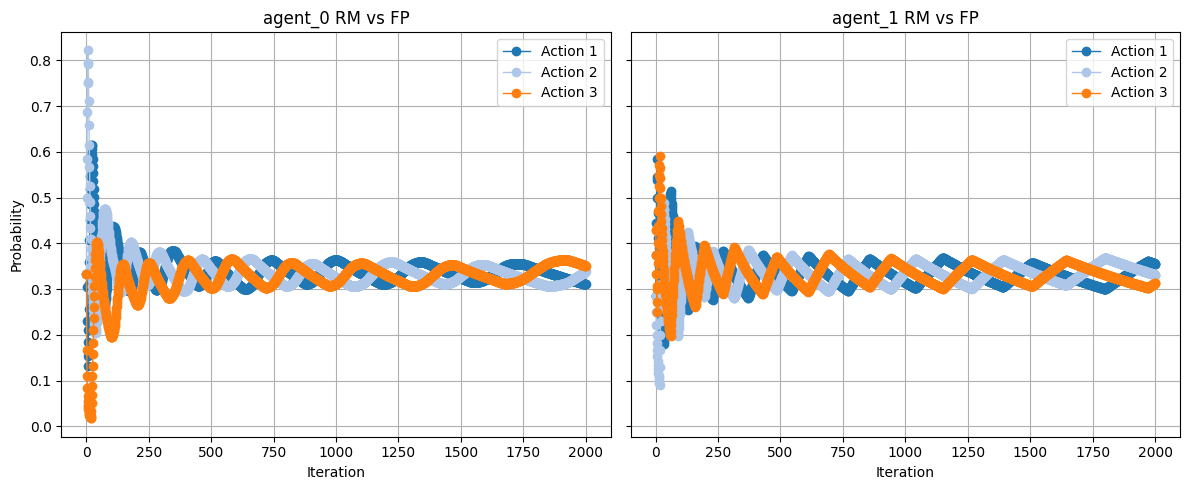

In [13]:
rm_vs_fp_agents = {agents[0]: RegretMatching(game=game, agent=agents[0], seed=17),
              agents[1]: FictitiousPlay(game=game, agent=agents[1], seed=50)}
policies, action_history = run_and_plot(rm_vs_fp_agents, game, num_iterations=2000, title_suffix="RM vs FP")

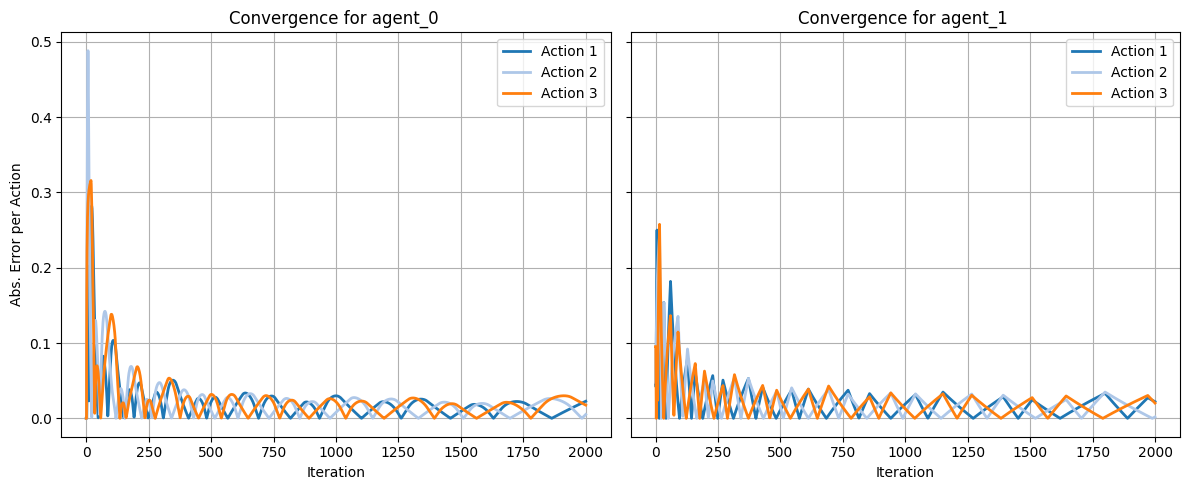

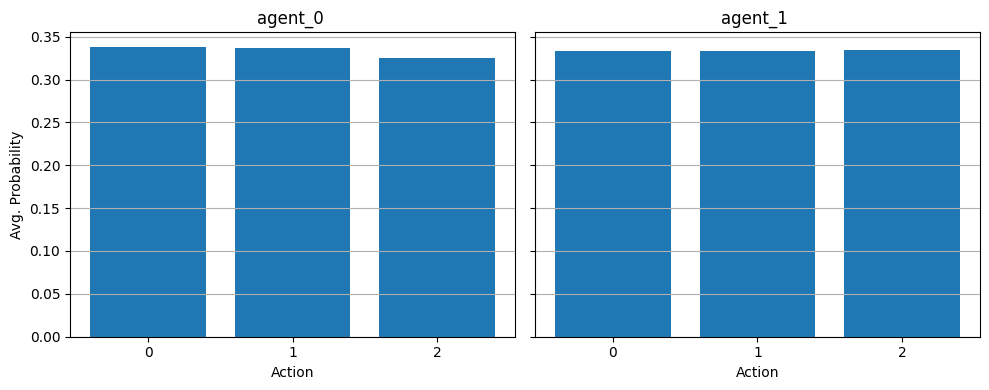

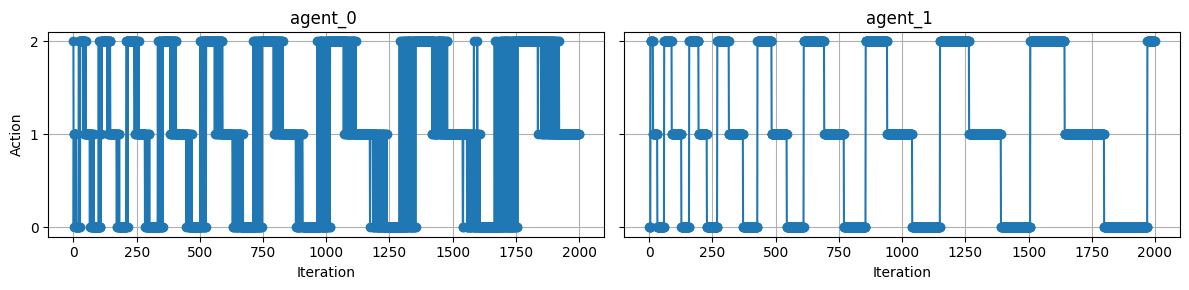

In [14]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

empirical = compute_empirical_distributions(action_history)

Plotting Rock (X) vs Paper (Y)...


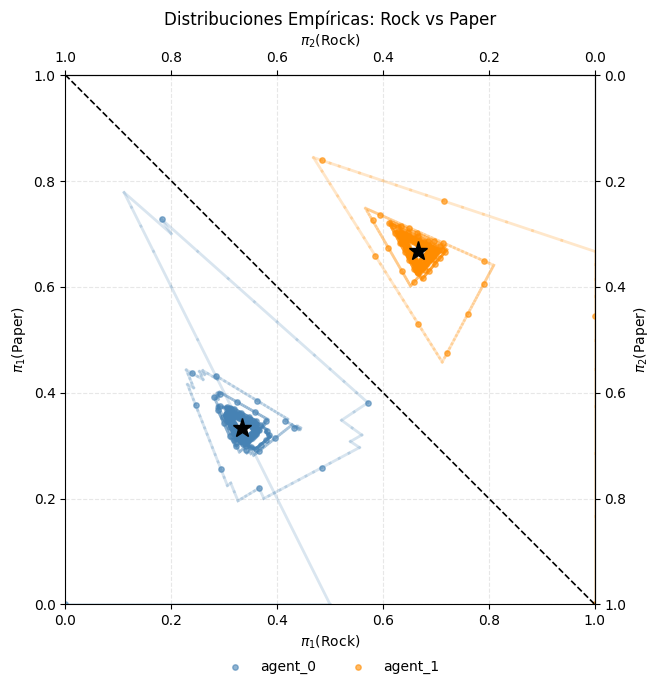


Plotting Paper (X) vs Scissors (Y)...


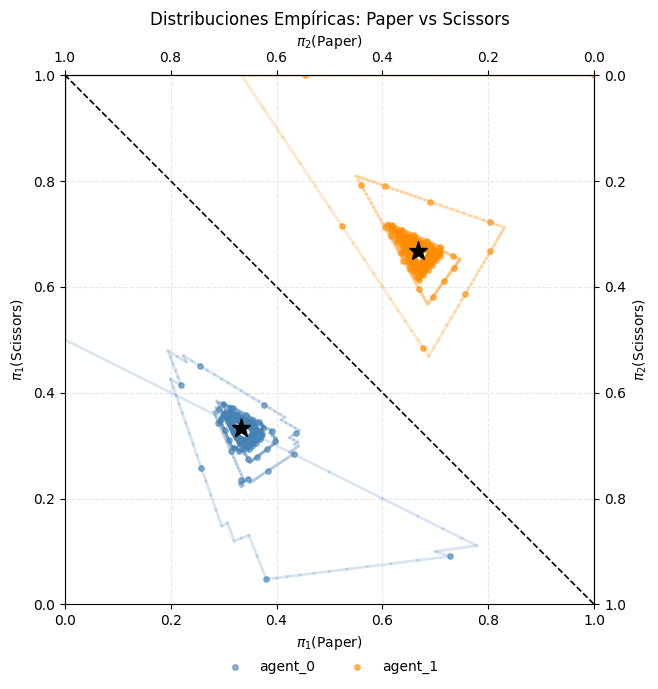


Plotting Scissors (X) vs Rock (Y)...


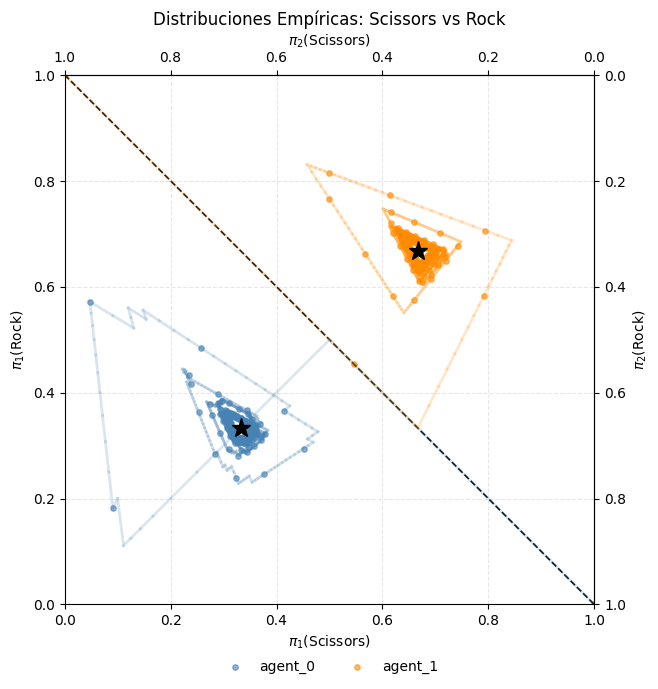

In [15]:
print("Plotting Rock (X) vs Paper (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_ROCK,    # Eje X: Probabilidad de Rock
    action2_idx=ACTION_PAPER,   # Eje Y: Probabilidad de Paper
    title="Distribuciones Empíricas: Rock vs Paper"
)

print("\nPlotting Paper (X) vs Scissors (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_PAPER,   # Eje X: Probabilidad de Paper
    action2_idx=ACTION_SCISSORS, # Eje Y: Probabilidad de Scissors
    title="Distribuciones Empíricas: Paper vs Scissors"
)

print("\nPlotting Scissors (X) vs Rock (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_SCISSORS, # Eje X: Probabilidad de Scissors
    action2_idx=ACTION_ROCK,     # Eje Y: Probabilidad de Rock
    title="Distribuciones Empíricas: Scissors vs Rock"
)



# Random Agent vs Random Agent

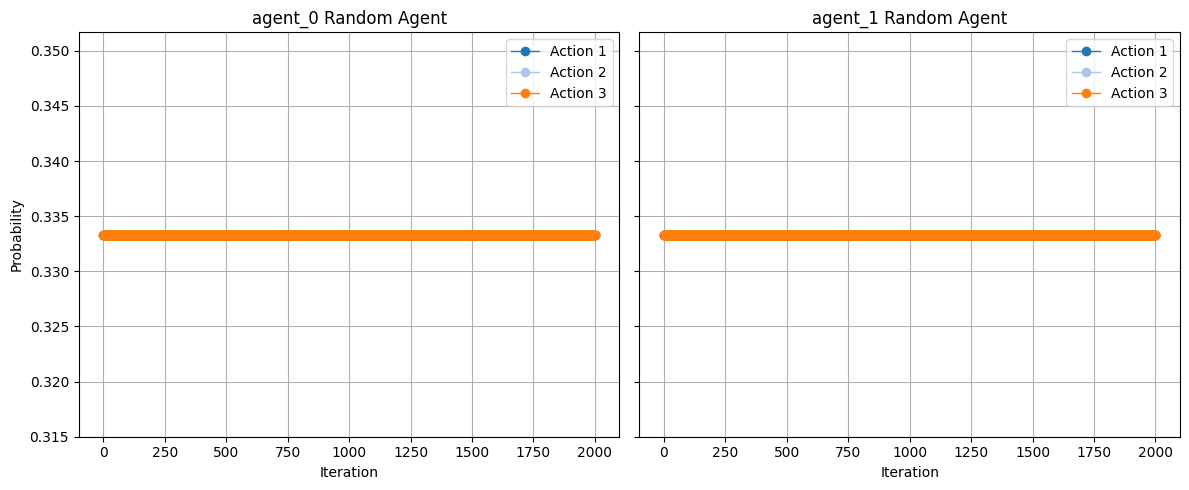

In [16]:
random_agents = {agent: RandomAgent(game, agent) for agent in agents}
policies, action_history = run_and_plot(random_agents, game, num_iterations=2000, title_suffix="Random Agent")

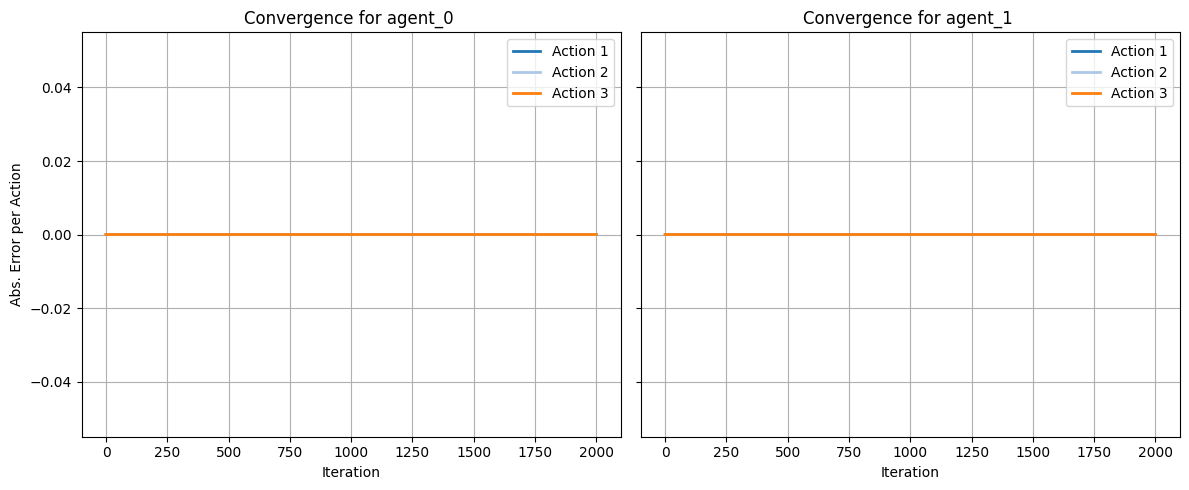

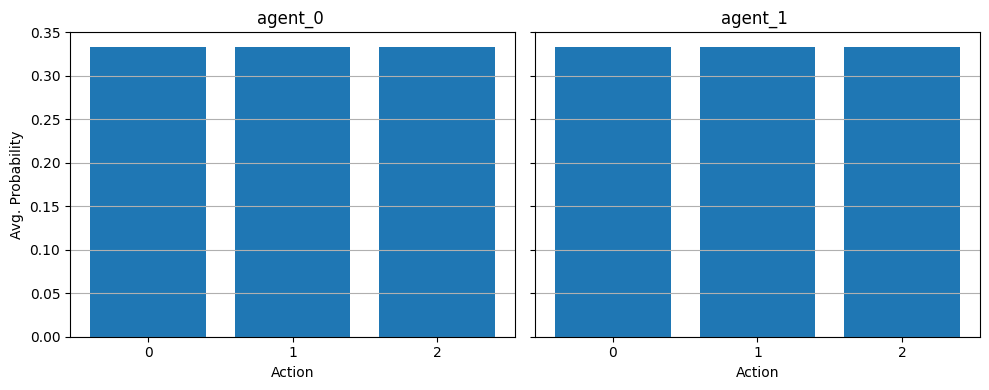

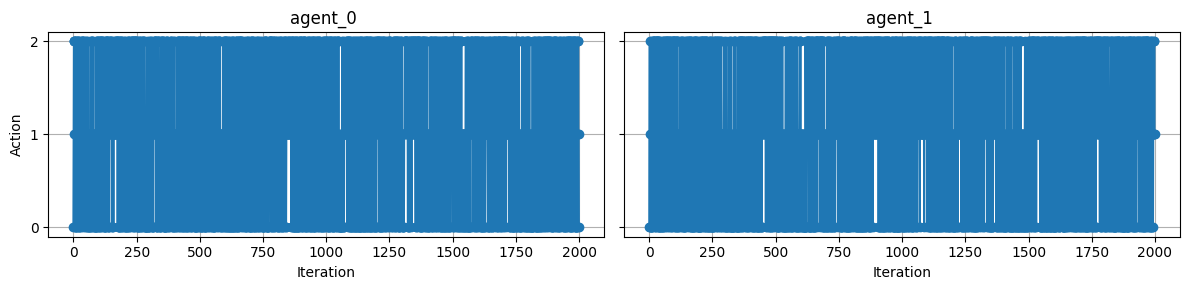

In [17]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Fictitious Play

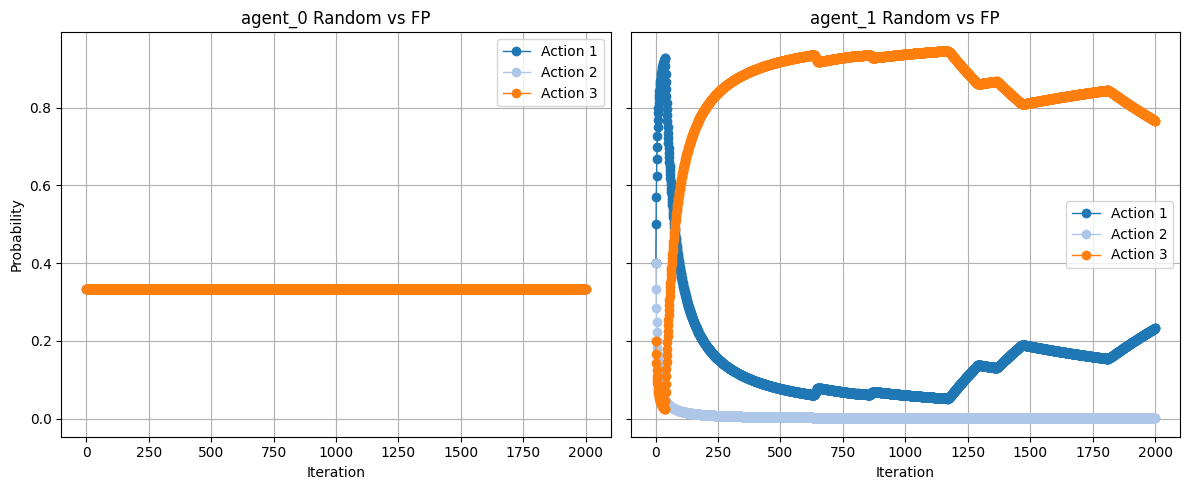

In [18]:
random_vs_fp_agents = {agents[0]: RandomAgent(game=game, agent=agents[0], seed=4),
                          agents[1]: FictitiousPlay(game=game, agent=agents[1], seed=4)}
policies, action_history = run_and_plot(random_vs_fp_agents, game, num_iterations=2000, title_suffix="Random vs FP")

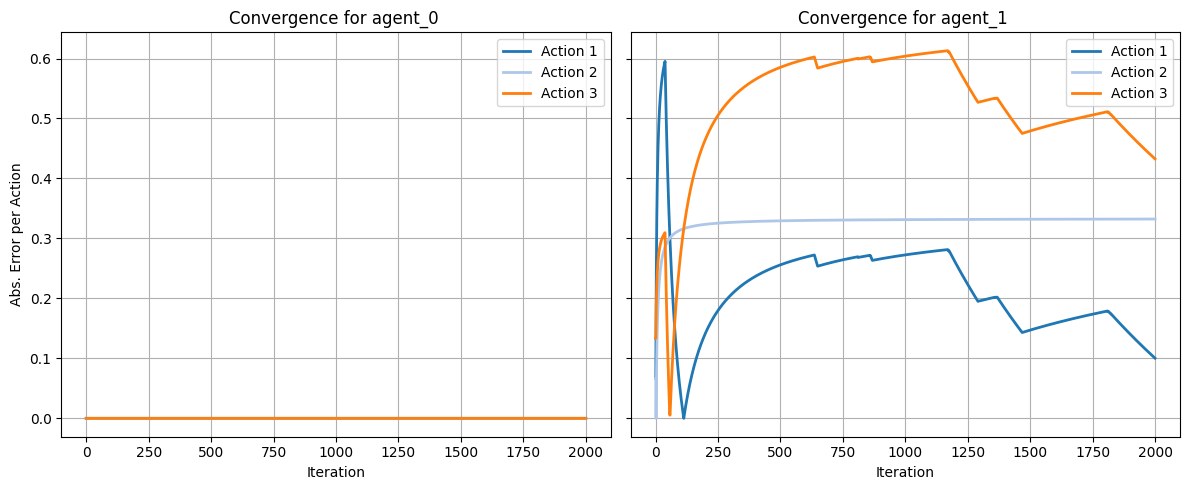

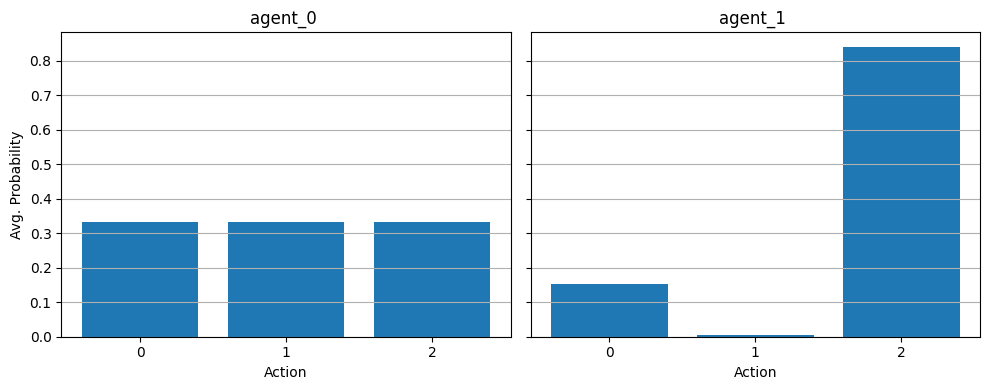

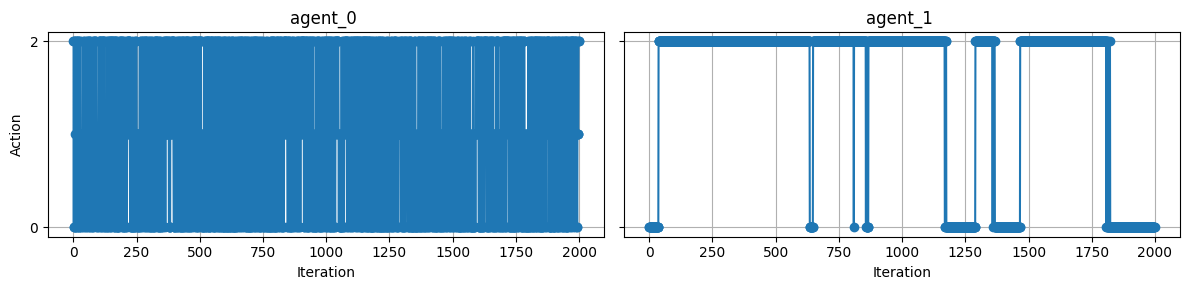

In [19]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

empirical = compute_empirical_distributions(action_history)

Plotting Rock (X) vs Paper (Y)...


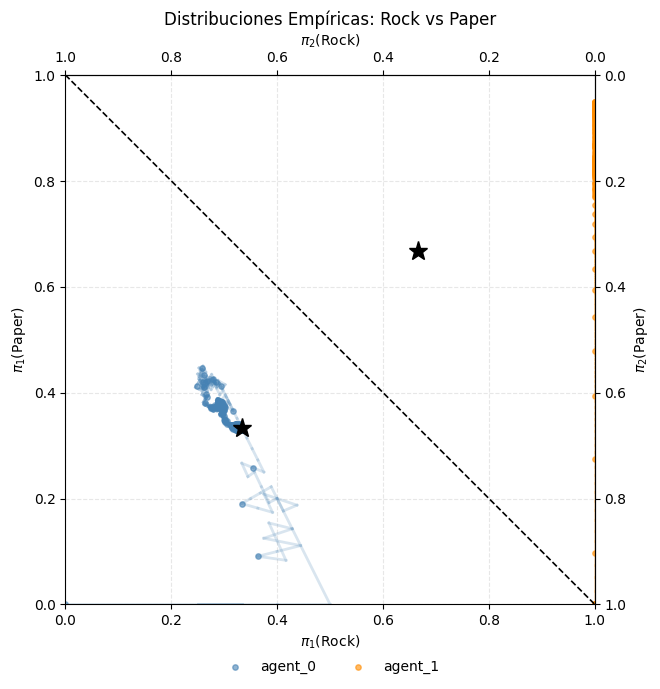


Plotting Paper (X) vs Scissors (Y)...


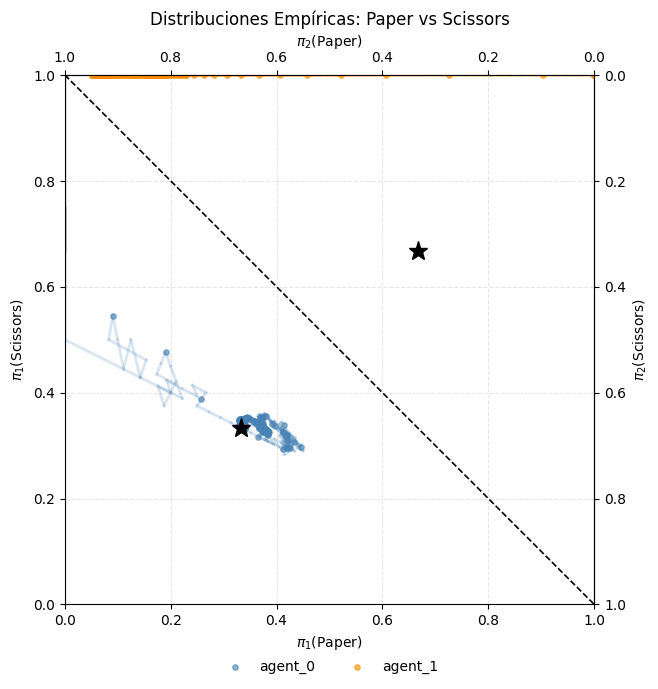


Plotting Scissors (X) vs Rock (Y)...


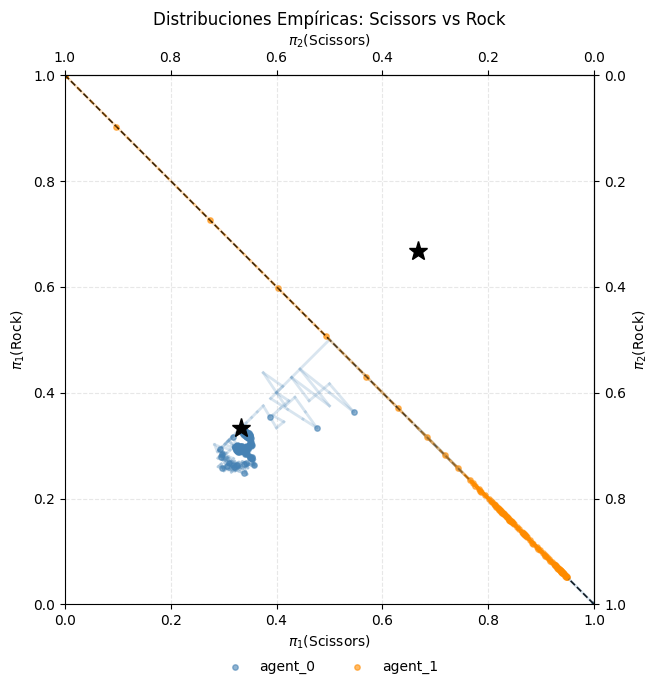

In [20]:
print("Plotting Rock (X) vs Paper (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_ROCK,    # Eje X: Probabilidad de Rock
    action2_idx=ACTION_PAPER,   # Eje Y: Probabilidad de Paper
    title="Distribuciones Empíricas: Rock vs Paper"
)

print("\nPlotting Paper (X) vs Scissors (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_PAPER,   # Eje X: Probabilidad de Paper
    action2_idx=ACTION_SCISSORS, # Eje Y: Probabilidad de Scissors
    title="Distribuciones Empíricas: Paper vs Scissors"
)

print("\nPlotting Scissors (X) vs Rock (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_SCISSORS, # Eje X: Probabilidad de Scissors
    action2_idx=ACTION_ROCK,     # Eje Y: Probabilidad de Rock
    title="Distribuciones Empíricas: Scissors vs Rock"
)



# Random Agent vs Regret Matching


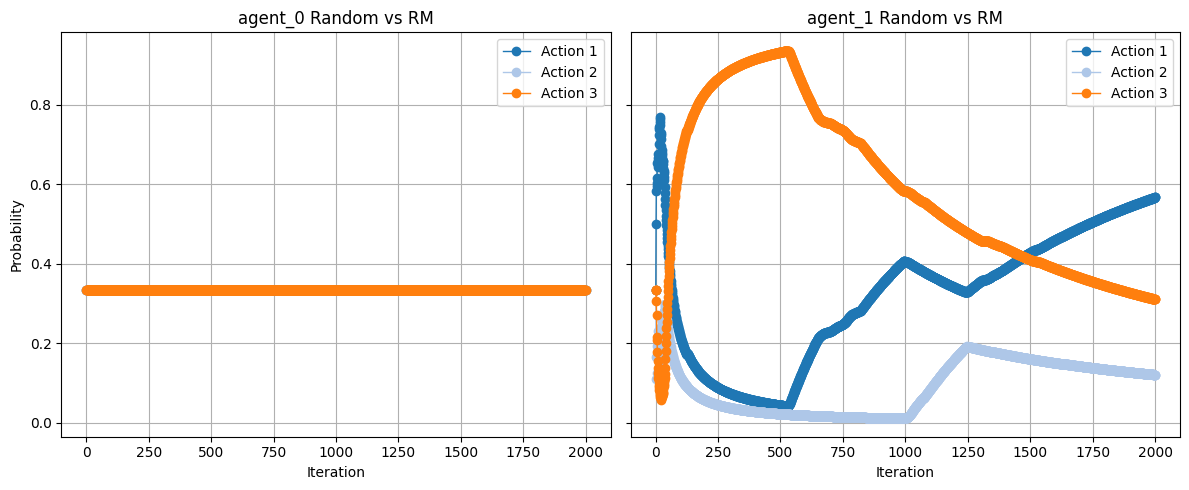

In [21]:
random_vs_rm_agents = {agents[0]: RandomAgent(game=game, agent=agents[0],seed=4),
                            agents[1]: RegretMatching(game=game, agent=agents[1], seed=4)}
policies, action_history = run_and_plot(random_vs_rm_agents, game, num_iterations=2000, title_suffix="Random vs RM")

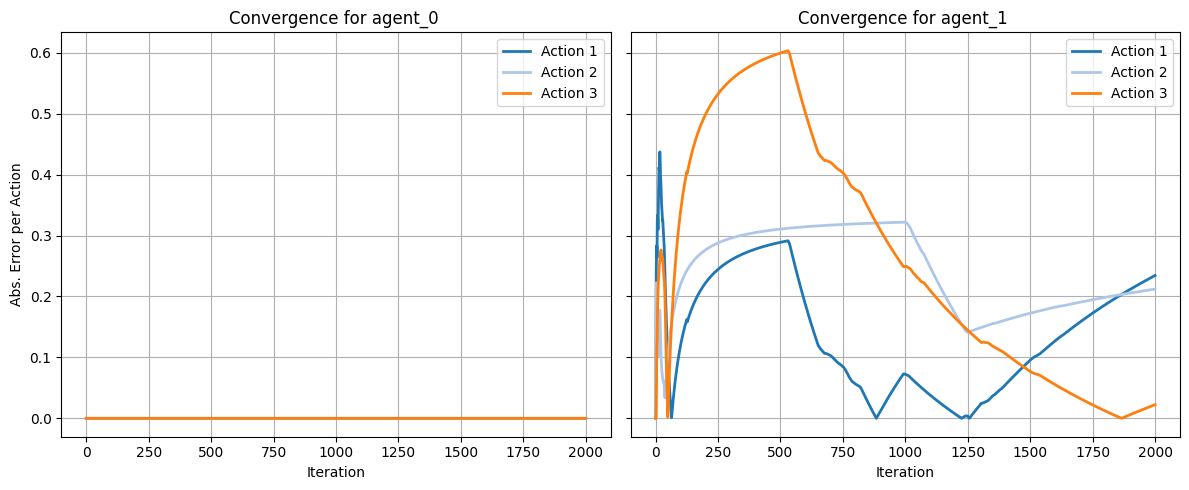

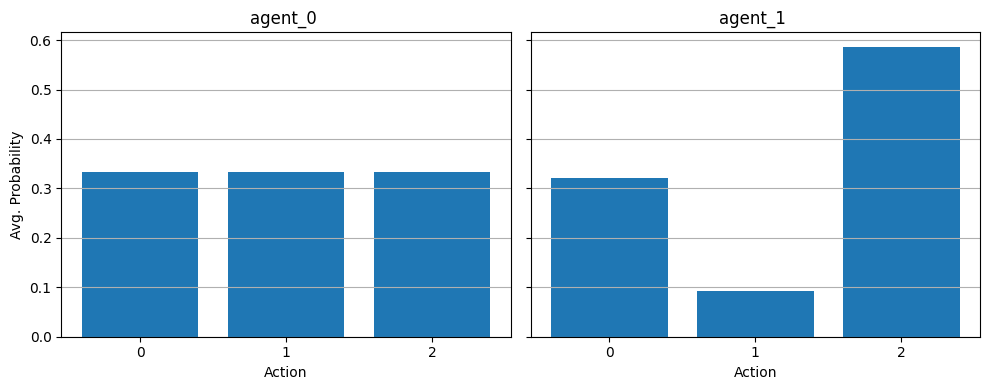

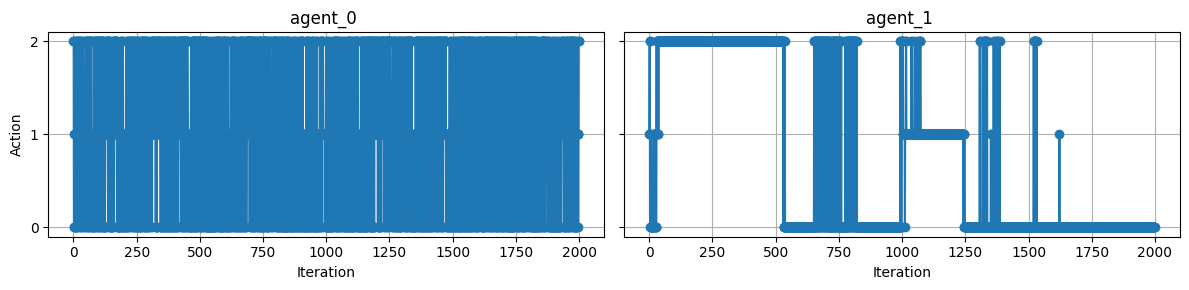

In [22]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

empirical = compute_empirical_distributions(action_history)

Plotting Rock (X) vs Paper (Y)...


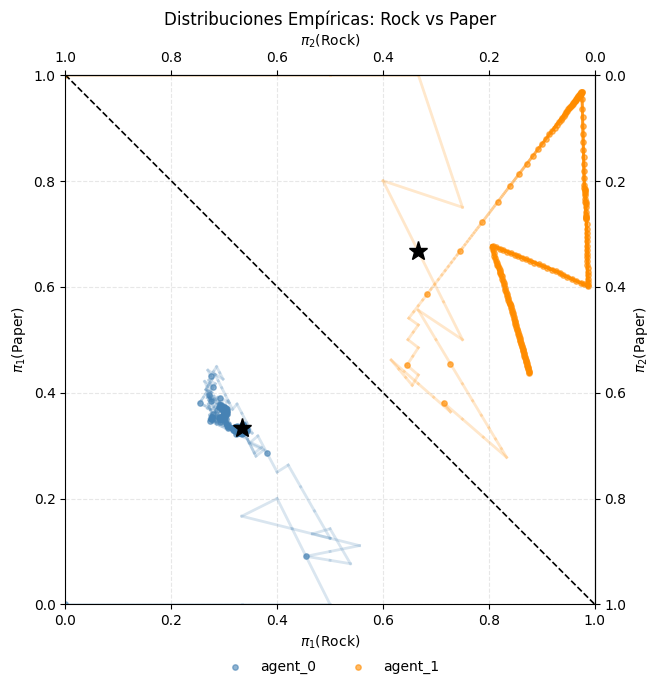


Plotting Paper (X) vs Scissors (Y)...


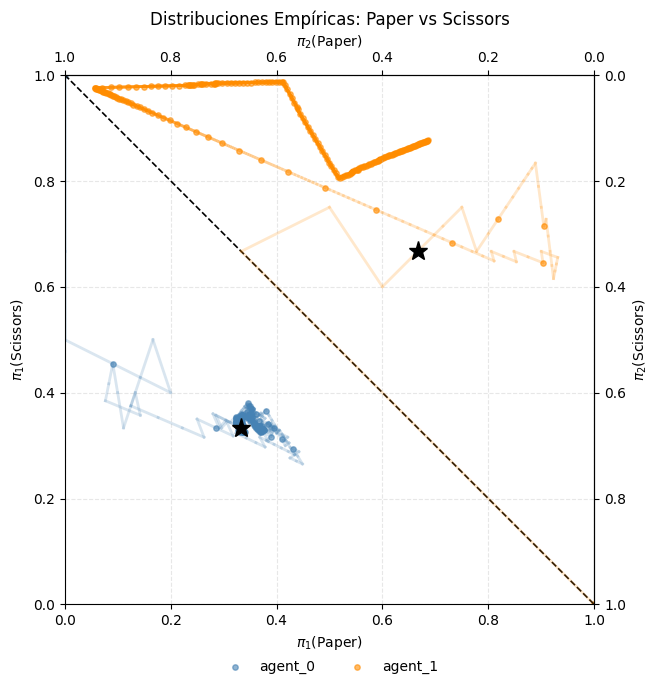


Plotting Scissors (X) vs Rock (Y)...


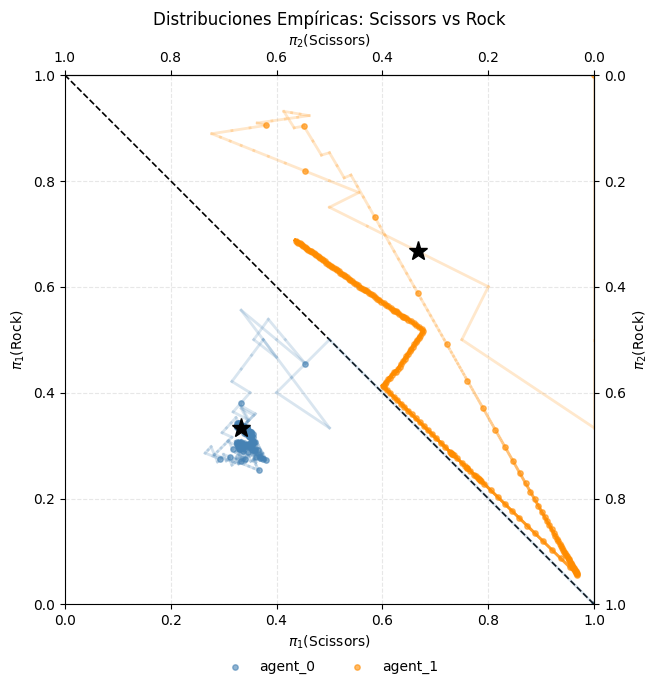

In [23]:
print("Plotting Rock (X) vs Paper (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_ROCK,    # Eje X: Probabilidad de Rock
    action2_idx=ACTION_PAPER,   # Eje Y: Probabilidad de Paper
    title="Distribuciones Empíricas: Rock vs Paper"
)

print("\nPlotting Paper (X) vs Scissors (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_PAPER,   # Eje X: Probabilidad de Paper
    action2_idx=ACTION_SCISSORS, # Eje Y: Probabilidad de Scissors
    title="Distribuciones Empíricas: Paper vs Scissors"
)

print("\nPlotting Scissors (X) vs Rock (Y)...")
plot_dual_agent_simplex(
    empirical_distributions=empirical,
    action_labels=ACTION_LABELS,
    action1_idx=ACTION_SCISSORS, # Eje X: Probabilidad de Scissors
    action2_idx=ACTION_ROCK,     # Eje Y: Probabilidad de Rock
    title="Distribuciones Empíricas: Scissors vs Rock"
)

